In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import matplotlib as plt

In [89]:
df = pd.read_csv('./data/PCA_Output.csv').drop('Unnamed: 0', axis=1)
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,Year,Round,School
0,6.076648,-1.976649,-2.848498,1.619673,-1.499366,-0.361836,1.019153,1.434457,0.714081,0.811379,...,0.688366,-0.304890,-0.281731,-0.205803,-0.140139,0.340214,-0.099955,0,6,Appalachian State
1,-5.397574,-1.225701,-2.640536,-0.686919,-2.231943,1.268349,-0.970858,0.854973,0.483640,0.945111,...,0.661443,0.159350,0.994632,0.590591,0.674845,0.279921,-0.757373,0,5,Arizona
2,-0.459077,-0.226509,-0.177002,-0.025225,-2.348304,-2.840060,-1.581769,-1.759809,0.738214,0.328368,...,-0.694507,-0.067370,-0.248602,0.238970,-0.456775,0.480758,-0.203236,0,6,Arkansas
3,0.737941,-2.735202,-1.689384,-1.009387,-1.348711,-2.272617,-0.260527,0.004799,-0.184886,1.096526,...,0.271134,0.544804,-0.797072,-0.432104,-0.827898,0.256052,-0.232796,0,5,Auburn
4,3.519914,2.074051,-0.954414,-0.144123,-1.547389,-1.325878,1.202000,2.277089,-1.031561,-0.126343,...,-1.376886,-1.040308,0.260123,-0.111515,-0.763786,0.158143,0.004584,0,6,Ball State


In [90]:
df_test = df.sample(frac=.2, replace=False).copy()
df_train = df.drop(df_test.index).copy()

features_train = df_train.drop(['Year', 'Round', 'School'], axis=1)
features_test = df_test.drop(['Year', 'Round', 'School'], axis=1)

targets_train = df_train.Round
targets_test = df_test.Round

In [91]:
gbt = GradientBoostingRegressor(max_depth=3, n_estimators=5000, learning_rate=.01)
gbt.fit(features_train, targets_train)

training = []

for target_train_predict in gbt.staged_predict(features_train):
    R2_train = r2_score(targets_train, target_train_predict)
    training.append(R2_train)
    
testing = []
RMSE_test = []
for target_test_predict in gbt.staged_predict(features_test):
    R2_test = r2_score(targets_test, target_test_predict)
    testing.append(R2_test)
    RMSE_test.append(np.sqrt(mean_squared_error(targets_test, target_test_predict)))
    
res = pd.DataFrame()
res['test'] = testing
res['train'] = training
res['RMSE'] = RMSE_test

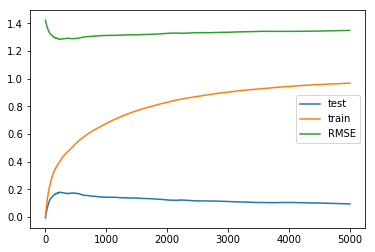

In [92]:
res.plot()

In [93]:
print(res.test.idxmax(), res.test.max())
print(res.RMSE.idxmin(), res.RMSE.min())

236 0.17959950098779787
236 1.283428291759503


In [94]:
gbt = GradientBoostingClassifier(max_depth=3, n_estimators=5000, learning_rate=.01)
gbt.fit(features_train, targets_train)

training = []

for target_train_predict in gbt.staged_predict(features_train):
    R2_train = r2_score(targets_train, target_train_predict)
    training.append(R2_train)
    
testing = []
RMSE_test = []
for target_test_predict in gbt.staged_predict(features_test):
    R2_test = r2_score(targets_test, target_test_predict)
    testing.append(R2_test)
    RMSE_test.append(np.sqrt(mean_squared_error(targets_test, target_test_predict)))
    
res = pd.DataFrame()
res['test'] = testing
res['train'] = training
res['RMSE'] = RMSE_test

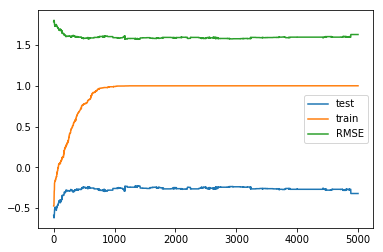

In [95]:
res.plot()

In [96]:
print(res.test.idxmax(), res.test.max())
print(res.RMSE.idxmin(), res.RMSE.min())

1366 -0.22837888431299147
1366 1.5704525600995771
